In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#data의 값은 숫자로 된 배열로써 특정 단어가 숫자로 매핑되어있다,
#label의 값은 리뷰의 긍정과 부정을 나타내는 값으로 부정 : 0, 긍정 : 1로 표현된다.

Using TensorFlow backend.


In [2]:
max([max(sequence) for sequence in train_data])

9999

### 숫자로 매핑 되어 있는 영단어를 원래 영어 단어로 바꾸기

In [3]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]) #단어와 정수 뒤집기
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
y_train = np.array(train_labels,np.float32)
y_test = np.array(test_labels,np.float32)
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


## 신경망 구현

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 
#출력 값은 step function과 비슷한 relu를 쓰면 안되고 쭉 연결되어있는 sigmoid로 나와야 한다. 편중된 확률을 막기 위해

In [33]:
#검증 데이터 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data =(x_val,y_val))


#자신이 원하는 옵티마이저, 손실함수, 측정 지표를 객체 형태로 전달 할 수 있다.
'''
from keras import optimizers
from keras import losses
from keras import metrics

model.complie(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
'''


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 310us/step - loss: 0.5010 - accuracy: 0.7899 - val_loss: 0.3766 - val_accuracy: 0.8714
Epoch 2/20
15000/15000 [==============================] - 4s 291us/step - loss: 0.2956 - accuracy: 0.9062 - val_loss: 0.2982 - val_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.2167 - accuracy: 0.9303 - val_loss: 0.2873 - val_accuracy: 0.8873
Epoch 4/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.1754 - accuracy: 0.9421 - val_loss: 0.2975 - val_accuracy: 0.8818
Epoch 5/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.1421 - accuracy: 0.9549 - val_loss: 0.2915 - val_accuracy: 0.8863
Epoch 6/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.2945 - val_accuracy: 0.8853
Epoch 7/20
15000/15000 [==============================] - 4s 2

'\nfrom keras import optimizers\nfrom keras import losses\nfrom keras import metrics\n\nmodel.complie(optimizer=optimizers.RMSprop(lr=0.001),\n             loss=losses.binary_crossentropy,\n             metrics=[metrics.binary_accuracy])\n'

## 측정 그래프 그리기

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history

for key in history_dict.keys(): #history 값 안에 뭐가 들었는지
    print(key)

val_loss
val_accuracy
loss
accuracy


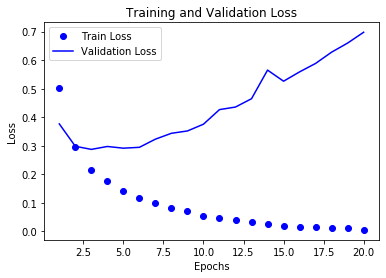

In [36]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Train Loss') #train loss 값의 경우 파란색 점으로 표시
plt.plot(epochs, val_loss, 'b', label='Validation Loss') #valitaion loss의 경우 파란색 라인으로 표시
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


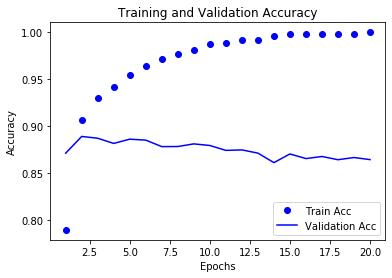

In [37]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Train Acc') #train accuracy 값의 경우 파란색 점으로 표시
plt.plot(epochs, val_acc, 'b', label='Validation Acc') #valitaion accuracy의 경우 파란색 라인으로 표시
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Epoch Step 4부터 과적합(Over Fitting) 현상이 나타나는 것을 볼 수 있다. 따라서 epoch=4를 넘어가는 것은 모델의 큰 의미가 없다

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 186us/step - loss: 0.4492 - accuracy: 0.8187
Epoch 2/4
25000/25000 [==============================] - 4s 178us/step - loss: 0.2591 - accuracy: 0.9111
Epoch 3/4
25000/25000 [==============================] - 4s 178us/step - loss: 0.1979 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 8s 305us/step
[0.3037795975732803, 0.879360020160675]


In [41]:
model.predict(x_test) #어떤 리뷰가 긍정적일 확률이 높인지 확인할 수 있다.

array([[0.17075323],
       [0.9999671 ],
       [0.6762288 ],
       ...,
       [0.10104429],
       [0.05827579],
       [0.42044806]], dtype=float32)

# 추가 실험

In [51]:
#검증 데이터 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
def drawLossGraph(loss,val_loss):
    

## 3개의 은닉층 사용해보기

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 196us/step - loss: 0.4762 - accuracy: 0.8027
Epoch 2/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.2552 - accuracy: 0.9114
Epoch 3/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.1952 - accuracy: 0.9308
Epoch 4/4
25000/25000 [==============================] - 8s 317us/step
[0.31416682125091555, 0.8807200193405151]


## 유닛 32 사용

In [44]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 187us/step - loss: 0.4321 - accuracy: 0.8219
Epoch 2/4
25000/25000 [==============================] - 4s 180us/step - loss: 0.2427 - accuracy: 0.9088
Epoch 3/4
25000/25000 [==============================] - 4s 179us/step - loss: 0.1888 - accuracy: 0.9313
Epoch 4/4
25000/25000 [==============================] - 8s 308us/step
[0.3194970583677292, 0.8748400211334229]


## 유닛 64사용

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.4215 - accuracy: 0.8145
Epoch 2/4
25000/25000 [==============================] - 5s 184us/step - loss: 0.2351 - accuracy: 0.9096
Epoch 3/4
25000/25000 [==============================] - 5s 183us/step - loss: 0.1816 - accuracy: 0.9315
Epoch 4/4
25000/25000 [==============================] - 8s 305us/step
[0.3636291533327103, 0.8651999831199646]


## 은닉층 3개에 32 유닛

In [47]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 192us/step - loss: 0.4535 - accuracy: 0.8082
Epoch 2/4
25000/25000 [==============================] - 5s 182us/step - loss: 0.2554 - accuracy: 0.9068
Epoch 3/4
25000/25000 [==============================] - 5s 183us/step - loss: 0.1955 - accuracy: 0.9276
Epoch 4/4
25000/25000 [==============================] - 8s 311us/step
[0.3196428287887573, 0.8773599863052368]


## 은닉층 3개에 64유닛

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 191us/step - loss: 0.4374 - accuracy: 0.7988
Epoch 2/4
25000/25000 [==============================] - 5s 183us/step - loss: 0.2422 - accuracy: 0.9073
Epoch 3/4
25000/25000 [==============================] - 5s 184us/step - loss: 0.1839 - accuracy: 0.9312
Epoch 4/4
25000/25000 [==============================] - 8s 317us/step
[0.3480023099637032, 0.8740800023078918]


## 손실함수 mse 사용

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 189us/step - loss: 0.1513 - accuracy: 0.8240
Epoch 2/4
25000/25000 [==============================] - 5s 182us/step - loss: 0.0799 - accuracy: 0.9101
Epoch 3/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.0595 - accuracy: 0.9300
Epoch 4/4
25000/25000 [==============================] - 8s 310us/step
[0.08959815968394279, 0.8781200051307678]


## 활성함수 tanh 사용

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 189us/step - loss: 0.1340 - accuracy: 0.8300
Epoch 2/4
25000/25000 [==============================] - 4s 165us/step - loss: 0.0685 - accuracy: 0.9128
Epoch 3/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.0507 - accuracy: 0.9366
Epoch 4/4
25000/25000 [==============================] - 9s 343us/step
[0.09285728975147009, 0.8770400285720825]
